# Prediksi Penyakit Ginjal Kronis Menggunakan Data Medis Pasien

## Pendahuluan

Penyakit Ginjal Kronis (Chronic Kidney Disease / CKD) merupakan kondisi medis yang ditandai dengan penurunan fungsi ginjal secara bertahap hingga akhirnya gagal ginjal total jika tidak ditangani. Ginjal memainkan peran vital dalam menyaring limbah dari darah dan mengatur keseimbangan elektrolit tubuh. Gangguan fungsi ginjal dapat mempengaruhi berbagai sistem tubuh dan meningkatkan risiko kematian.

Deteksi dini terhadap penyakit ginjal kronis sangat penting karena gejalanya pada tahap awal seringkali tidak jelas. Pemeriksaan laboratorium seperti kadar kreatinin serum, kadar urea darah, analisis urin, dan tekanan darah menjadi indikator utama dalam diagnosis CKD. Dengan kemajuan teknologi dan data medis yang tersedia, pendekatan machine learning dapat digunakan untuk membangun model klasifikasi yang mampu memprediksi kemungkinan CKD berdasarkan data klinis pasien.

## Data Understanding

### Sumber Data

Dataset yang saya digunakan berasal dari:
https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease

Dataset Chronic Kidney Disease (CKD) ini berasal dari gabungan sumber medis termasuk hospitals di India. Dataset mencakup 400 data pasien dengan 24 fitur medis dan 1 label target, digunakan untuk membantu membedakan apakah seorang pasien menderita CKD atau tidak.

### Tujuan

Tujuan utama penggunaan dataset ini adalah:
- Membangun model prediktif klasifikasi untuk memutuskan apakah seorang pasien menderita penyakit ginjal kronis (ckd) atau tidak (notckd) berdasarkan data medis pasien.
- Mendukung diagnosa dini untuk intervensi medis yang lebih cepat.

### Integrasi Data

Untuk mengambil data agar dapat diolah, perlu untuk menginstal package atau menggunakan metode yang sesuai dengan dataset yang disediakan oleh UCI Machine Learning Repository. Proses ini dilakukan agar kita dapat menarik data dari UCI dataset dan menggunakannya dalam analisis data atau pelatihan model machine learning.

Berbeda dengan beberapa dataset lain yang sudah tersedia langsung melalui package ucimlrepo, dataset Chronic Kidney Disease (CKD) belum tersedia langsung dalam pustaka tersebut. Maka dari itu, kita perlu membaca dataset ini secara manual melalui URL resmi UCI atau dengan mendownload file-nya terlebih dahulu.

Perintah untuk mengambil data dari UCI dataset dapat dilihat setelah membuka halaman dataset, lalu memilih file .arff atau .csv yang tersedia. Data tersebut kemudian dibaca menggunakan Python sesuai format file-nya.

Contoh pengambilan data dari UCI dataset dapat dilihat pada gambar dan perintah berikut:

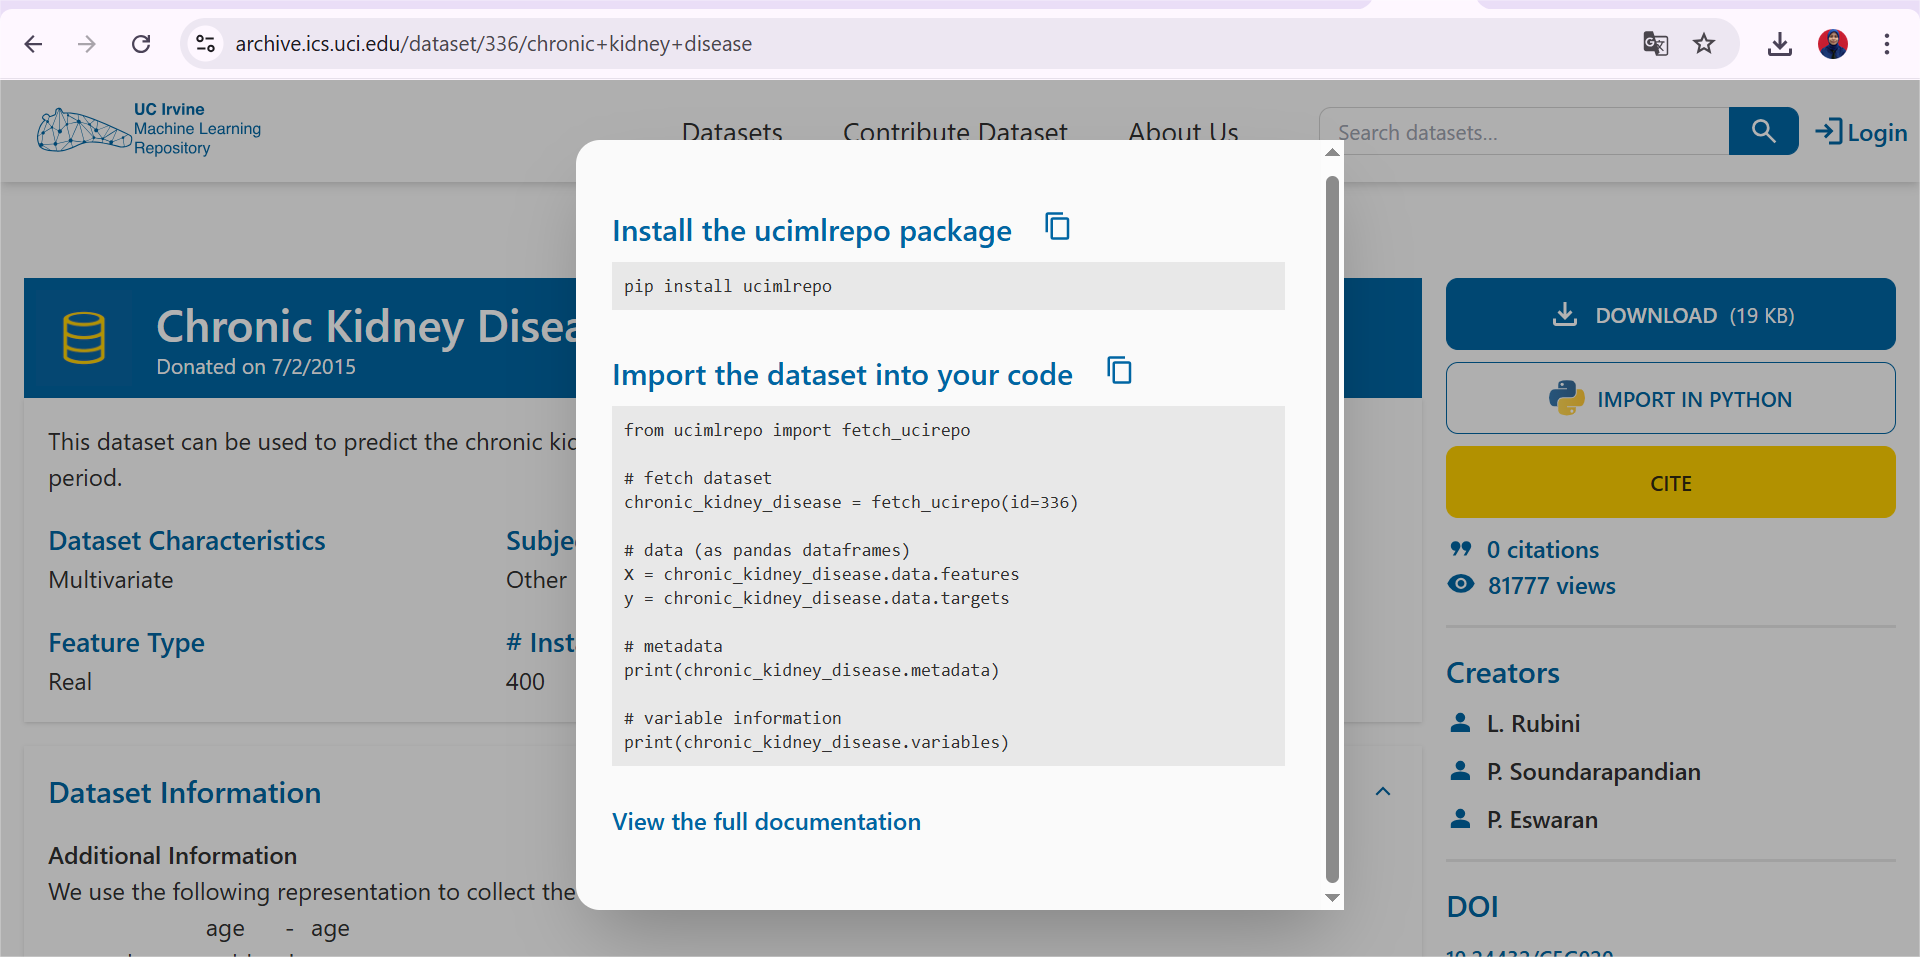



In [1]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

# data (as pandas dataframes)
X = chronic_kidney_disease.data.features
y = chronic_kidney_disease.data.targets

# gabungkan fitur dan target menjadi satu DataFrame
data = chronic_kidney_disease.data.original

# simpan hasil komputasi ke dalam file CSV
data.to_csv("chronic_kidney_disease.csv", index=True)

# tampilkan info kolom/fitur
print(data.info())  # untuk menampilkan informasi fitur-fitur yang ada di tabel

# tampilkan 5 baris pertama dari data
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

### Ekplorasi Data

#### Visualisasi Data



In [4]:
# Menampilkan 5 baris pertama dataset
display(data)  # sama seperti contoh mammographic_mass

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


/tmp/ipython-input-9-2756685285.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=data, palette='viridis')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


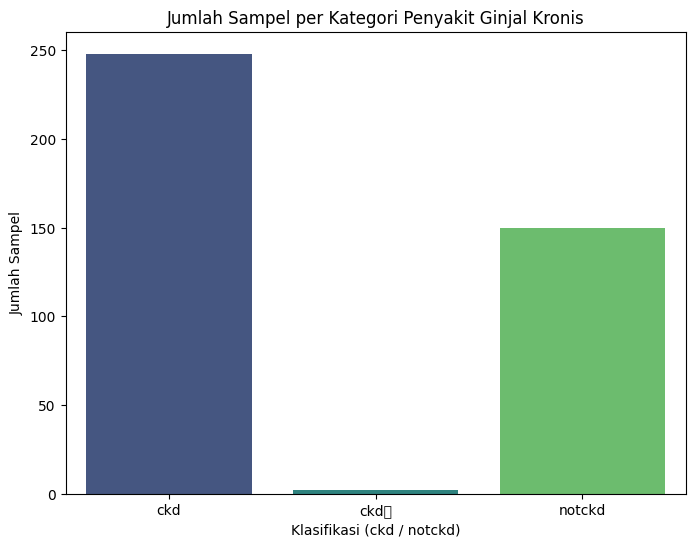

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=data, palette='viridis')
plt.title('Jumlah Sampel per Kategori Penyakit Ginjal Kronis')
plt.xlabel('Klasifikasi (ckd / notckd)')
plt.ylabel('Jumlah Sampel')
plt.show()

<Figure size 1200x1000 with 0 Axes>

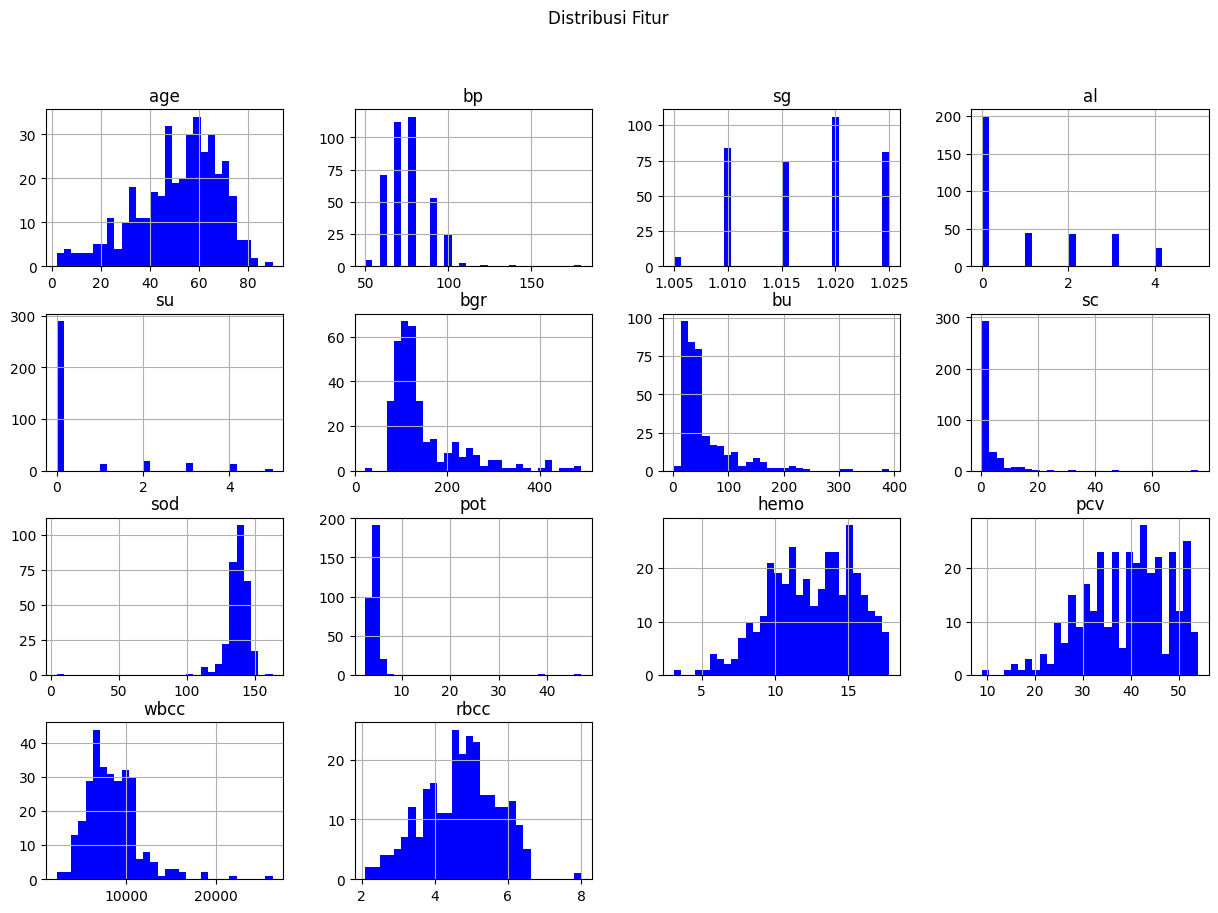

In [11]:
# Visualisasi distribusi fitur dengan histogram
plt.figure(figsize=(12, 10))
data.hist(bins=30, figsize=(15, 10), color='blue')
plt.suptitle('Distribusi Fitur')
plt.show()